# 1) Optical flow e tracking

In [1]:
# Python Version 3.7
# OpenCV Version 4.1.2 
# Numpy Version 1.16.2
# Matplotlib Version 3.1.3

#   Examples
# Example of two tracking points to stop the test1.mp4 video tracking_point =  np.array([np.array([[125., 135.]]), np.array([[125., 120.]])]
#Example of two tracking points to stop the test2.mp4 video tracking_point =  np.array([np.array([[125., 100.]]), np.array([[100., 70.]])], dtype=np.float32)
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lucas-Kanade Optical Flow in OpenCV
class OpticalFlow():
    def __init__(self):
        # Parameters for lucas kanade optical flow
        self.lk_params = dict( winSize  = (15,15),
                   maxLevel = 2,
                   criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
        # Create some random colors
        self.color = np.random.randint(0,255,(100,3))
        
    def lucasKenedMethod(self, video_path, tracking_point, n_frames):
        """ Method tracking the point Lucas-Kanade Optical Flow in OpenCV"""
        # Load video
        cap = cv2.VideoCapture(video_path)
        ret, fist_frame  = cap.read()
        old_gray = cv2.cvtColor(fist_frame, cv2.COLOR_BGR2GRAY)
        
        # Create a mask image for drawing purposes
        mask = np.zeros_like(fist_frame)
        
        #
        for j in range(0, n_frames):
            ret,frame = cap.read()
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, tracking_point, None, **self.lk_params)
            # Select good points
            good_new = p1[st==1]
            good_old = tracking_point[st==1]
            
            # draw the tracks
            for i,(new,old) in enumerate(zip(good_new,good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv2.line(mask, (a,b),(c,d), self.color[i].tolist(), 2)
                frame = cv2.circle(frame,(a,b),5,self.color[i].tolist(),-1)
            img = cv2.add(frame,mask)
            
            cv2.imshow('Video',img)
            cv2.waitKey(30)
            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            tracking_point = good_new.reshape(-1,1,2)
        cv2.destroyAllWindows()
        return img # Last frame
    
    def ImgChooseTracking(self, video_path):
        " Return image of the first frame to assist in choosing the tracking point"
        cap = cv2.VideoCapture(video_path)
        ret, fist_frame  = cap.read()
        return fist_frame # Fist frame

In [3]:
opf = OpticalFlow() # Object class OpticalFlow

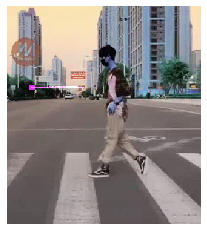

In [10]:
# Example one point test1.mp4
video_path = 'videos/test1.mp4'
#Defining the tracking point at the X and Y coordinates of the first frame
# A tree at the bottom of the video
tracking_point =  np.array([np.array([[125., 135.]])], dtype=np.float32) 
# Defining the number of frames
n_frames = 300 

# Execute the tracking of the selected point in the video real time
lest_frame = opf.lucasKenedMethod(video_path, tracking_point, n_frames)
plt.axis('off')
plt.imshow(lest_frame, cmap="gray") # Plot result the tracking point

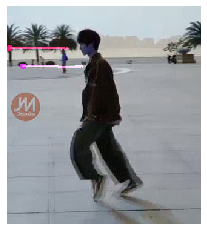

In [11]:
# Example one two points test2.mp4
video_path = 'videos/test2.mp4'
#Defining the tracking point at the X and Y coordinates of the first frame
tracking_point =  np.array([np.array([[125., 100.]]), np.array([[100., 70.]])], dtype=np.float32)
# Defining the number of frames
n_frames = 300 
# Execute the tracking of the selected point in the video real time
lest_frame = opf.lucasKenedMethod(video_path, tracking_point, n_frames)
plt.axis('off')
plt.imshow(lest_frame, cmap = 'gray') # Plot result the tracking point
plt.show()

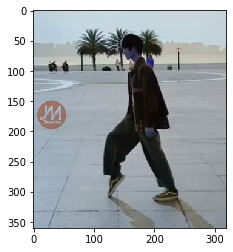

In [14]:
############# Optional ####################
# Plot first frame to assist in choosing the tracking point
fist_frame = opf.ImgChooseTracking(video_path) # image of lest frame
plt.imshow(fist_frame) 